# Analisis generarl de la serie de tiempo
Se crea una rutina de reportes para poder visualizar el estado de la serie temporal, la idea es comenzar desde el analisis general de la serie hasta el analisis especifico como analisis mensual y diario.
Con esto se pretende generar una serie de metricas para determinar que metodos de intermpolacion podemos utilizar para la imputacion de datos ausentes.

In [3]:
from api_somo import DataFetcher, fetch_qf 
import logging

# Setting up logging for the main script
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

api_url = "http://127.0.0.1:8000/database/filter-serie/"
params = {
    "station_name": "tumaco",
    "variable_name": "Precipitación acumulada",
    "processing_level_name": "Control de calidad",
    "start_date":"2011-01-01",
    "end_date":"2011-12-31"
    }

try:
    # 1. Fetch and process the data
    serie_historica = DataFetcher.fetch_and_process_data(api_url, params)

    if serie_historica.empty:
        raise ValueError("The historical series is empty.")

    # Additional processing with the historical series
    logger.info(f"Fetched historical series: {serie_historica.head(0)}")

except Exception as e:
    logger.error(f"Error fetching historical series: {e}")


display(serie_historica)


INFO:api_somo:Sending request to http://127.0.0.1:8000/database/filter-serie/ with parameters: {'station_name': 'tumaco', 'variable_name': 'Precipitación acumulada', 'processing_level_name': 'Control de calidad', 'start_date': '2011-01-01', 'end_date': '2011-12-31'}
INFO:api_somo:Original columns: ['date_time', 'sensor_data', 'quality_flag', 'latitude', 'longitude']
INFO:api_somo:Columns after renaming: ['timestamp', 'value', 'qf', 'latitude', 'longitude']
INFO:api_somo:Timestamp conversion and indexing complete.
INFO:__main__:Fetched historical series: Empty DataFrame
Columns: [value, qf, latitude, longitude]
Index: []


,value,qf,latitude,longitude
timestamp,,,,
2011-01-01 05:00:00+00:00,0.0,1,1.82011,-78.72871
2011-01-01 05:10:00+00:00,0.0,1,1.82011,-78.72871
2011-01-01 05:20:00+00:00,0.0,1,1.82011,-78.72871
2011-01-01 05:30:00+00:00,0.0,1,1.82011,-78.72871
2011-01-01 05:40:00+00:00,0.0,1,1.82011,-78.72871
...,...,...,...,...
2011-12-31 04:20:00+00:00,0.1,1,1.82011,-78.72871
2011-12-31 04:30:00+00:00,0.0,1,1.82011,-78.72871
2011-12-31 04:40:00+00:00,0.0,1,1.82011,-78.72871


---
# Analisis de la calidad de la serie Historica
En este grafico podemos ver el total de datos agrupados por calidad en cada mes, es decir si una serie tiene 15 años tiene 15 eneros, 15 noviembres etc, con esta grafica podemos ver a modo general con cuantos datos del total contamos para la recuperacion de la serie y los datos faltantes, esta grafica es muy importante porque nos da  un marcador de calidad historico por meses, incluso aqui se puede analizar si la perdida de datos es sistematica o si tiene algun comportamiento con correlacion temporal.

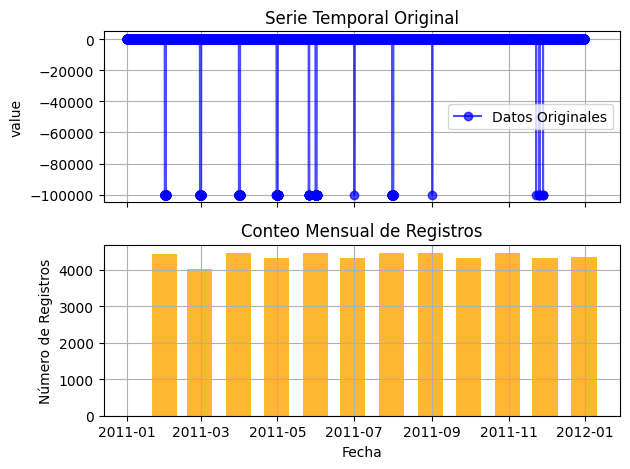

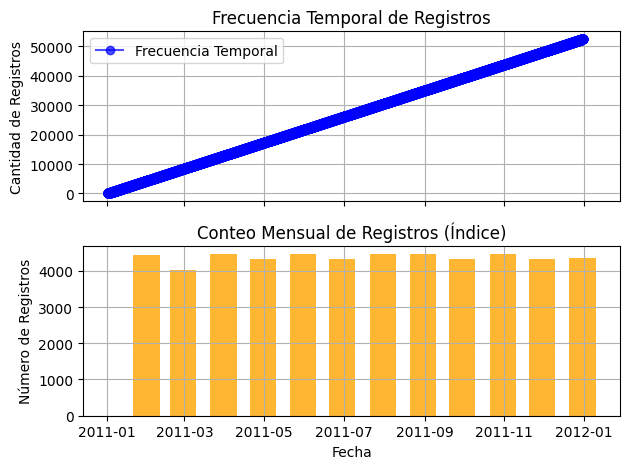

timestamp
2011-01-31 00:00:00+00:00    4434
2011-02-28 00:00:00+00:00    4032
2011-03-31 00:00:00+00:00    4464
2011-04-30 00:00:00+00:00    4320
2011-05-31 00:00:00+00:00    4464
2011-06-30 00:00:00+00:00    4320
2011-07-31 00:00:00+00:00    4464
2011-08-31 00:00:00+00:00    4464
2011-09-30 00:00:00+00:00    4320
2011-10-31 00:00:00+00:00    4464
2011-11-30 00:00:00+00:00    4320
2011-12-31 00:00:00+00:00    4351
Freq: ME, Name: timestamp, dtype: int64

In [7]:
#serie_historica = serie_historica.loc['2009-02':'2009-03']
from utils.utils import _count, analyze_time_series, analyze_time_series_index
analyze = analyze_time_series(serie_historica)
report_index = analyze_time_series_index(serie_historica)
display(report_index)

In [8]:
from graphics_utils.express import fig_pie_month, fig_boxplot, fig_lineplot

display(serie_historica[serie_historica['qf'] == 9])


line_fig = fig_lineplot(serie_historica, params, color=None)
line_fig.show()
pie_fig = fig_pie_month(serie_historica, params)
pie_fig.show()
boxplot_fig = fig_boxplot(serie_historica, params, color='month')
boxplot_fig.show()

,value,qf,latitude,longitude,month,year
timestamp,,,,,,
2011-01-31 05:10:00+00:00,-99999.0,9,1.82011,-78.72871,January,2011
2011-01-31 05:20:00+00:00,-99999.0,9,1.82011,-78.72871,January,2011
2011-01-31 05:30:00+00:00,-99999.0,9,1.82011,-78.72871,January,2011
2011-01-31 05:40:00+00:00,-99999.0,9,1.82011,-78.72871,January,2011
2011-01-31 05:50:00+00:00,-99999.0,9,1.82011,-78.72871,January,2011
...,...,...,...,...,...,...
2011-11-25 07:20:00+00:00,-99999.0,9,1.82011,-78.72871,November,2011
2011-11-25 19:20:00+00:00,-99999.0,9,1.82011,-78.72871,November,2011
2011-11-28 09:00:00+00:00,-99999.0,9,1.82011,-78.72871,November,2011


---
## Analisis de la calidad por años
Luego de tener una vision general de los datos, entonces veremos la calidad de la serie pero segmentada por años, en estos vamos a tomar la historica y realizaremos el grafico anterior pero aplicado a cada año, con el fin de comenzar a reconstuir el año que contenga la mayor cantidad de datos buenos.

In [6]:
serie_2020 = serie_historica.loc['2020']
"""serie_2021 = serie_historica.loc['2021']"""
print(serie_2020)
from graphics_utils import pie
# Agrupamos los datos por año
figs = {}  # Diccionario para almacenar las figuras por año
for año, serie in serie_2020.groupby(serie_2020.index.year):
    print(f"Año: {año}")
    line_fig = fig_lineplot(serie['value'], params)
    line_fig.show()
    # Generar la figura pie para el año actual
    report = pd.DataFrame()
    #pie_year_fig = fig_pie_chart_by_month(serie, params)
    #pie_year_fig.show()

KeyError: '2020'

In [ ]:
from graphics_utils.go import fig_pie_chart_by_month
from graphics_utils.express  import fig_lineplot
serie_ = serie_historica.loc['2009']
print(serie_2020)
line_fig = fig_lineplot(serie_['value'], params)
line_fig.show()
pie_fig = fig_pie_chart_by_month(serie_, params)
pie_fig.show()
boxplot_fig = fig_boxplot(serie_, params, color='month')
boxplot_fig.show()

NameError: name 'serie_historica' is not defined

: 

# Descomponer la serie temporal
Esta seccion se crea para hacer el procesamiento de descomposicion

In [ ]:
IS = decompose_time_series(insitu)

NameError: name 'insitu' is not defined